In [1]:
!pip install matplotlib
!pip install sklearn
!pip install pandas
!pip install gensim
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
%matplotlib inline

     |████████████████████████████████| 10.3 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 66.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 45.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 53.3 MB/s eta 0:00:01
     |████████████████████████████████| 23.2 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 67.1 MB/s eta 0:00:01
     |████████████████████████████████| 28.5 MB 44.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=d5e486de24888f1cb7d0f7be9aa7367f3123a3b23ee768b8472bec341eb7d715
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
     |████████████████████████████████| 11.3 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 24.1 MB 2.6 MB/s eta 0:00:0100:09
     |████████████████████████████████| 58 kB 6.8 MB/s  eta 0:00:01
     |████

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# Importing modules
import pandas as pd
import os
import glob
import csv

# path for original transript csv files
# path = '/home/jovyan/Transcripts/'
# path for speaker grouped transript csv files
# path = '/home/jovyan/GroupedTranscripts/'
path = '/home/jovyan/NGroupedLC/'

allfiles = glob.glob(path + "*.csv")

q1 = []
q2 = []
q3 = []
q4 = []
q5 = []
q6 = []
year0 = "2018"
fileList0 = []
for file in allfiles:
    if(year0 in file):
        # print(file)
        df = pd.read_csv(file, header=None, sep='\n', quoting=csv.QUOTE_NONE, encoding='utf-8')
        fileList0.append(df)
        q1.append(df)
# print(q1)

# get all 2018, 2019, 2020, csvs
year = "2019"
fileList = []
for file in allfiles:
    if(year in file):
        df = pd.read_csv(file, header=None, sep='\n', quoting=csv.QUOTE_NONE, encoding='utf-8')
        fileList.append(df)
        if('January' in file or 'February' in file or 'March' in file or 'April' in file ):
            q2.append(df)
        if('May' in file or 'June' in file or 'July' in file or 'August' in file ):
            q3.append(df)
        if('September' in file or 'October' in file or 'November' in file or 'December' in file ):
            q4.append(df)
            

jan19 = []
feb19 = []
mar19 = []
apr19 = []
may19 = []
jun19 = []
jul19 = []
aug19 = []
sep19 = []
oct19 = []
nov19 = []
dec19 = []

year1 = "2020"
fileList1 = []
for file in allfiles:
    if(year1 in file):
        df = pd.read_csv(file, header=None, sep='\n', quoting=csv.QUOTE_NONE, encoding='utf-8')
        fileList1.append(df)
        if('June' in file or 'February' in file or 'March' in file or 'July' in file ):
            q5.append(df)
        if('September' in file or 'October' in file or 'November' in file or 'August' in file ):
            q6.append(df)
                
# papers = pd.concat(fileList, axis=0, ignore_index=True)
# papers1 = pd.concat(fileList1, axis=0, ignore_index=True)
# papers18 = pd.concat(fileList0, axis=0, ignore_index=True
q1papers = pd.concat(q1, axis=0, ignore_index=True)
q2papers = pd.concat(q2, axis=0, ignore_index=True)
q3papers = pd.concat(q3, axis=0, ignore_index=True)
q4papers = pd.concat(q4, axis=0, ignore_index=True)
q5papers = pd.concat(q5, axis=0, ignore_index=True)
q6papers = pd.concat(q6, axis=0, ignore_index=True)

In [18]:
# Load the regular expression library
import re
# 2019
q1papers['message_processed'] = \
q1papers[0].map(lambda x: re.sub('[,\.!?]', '', x))
q1papers['message_processed'] = \
q1papers['message_processed'].map(lambda x: x.lower())

# 2020
q2papers['message_processed'] = \
q2papers[0].map(lambda x: re.sub('[,\.!?]', '', x))
q2papers['message_processed'] = \
q2papers['message_processed'].map(lambda x: x.lower())

q3papers['message_processed'] = \
q3papers[0].map(lambda x: re.sub('[,\.!?]', '', x))
q3papers['message_processed'] = \
q3papers['message_processed'].map(lambda x: x.lower())

# 2020
q4papers['message_processed'] = \
q4papers[0].map(lambda x: re.sub('[,\.!?]', '', x))
q4papers['message_processed'] = \
q4papers['message_processed'].map(lambda x: x.lower())

q5papers['message_processed'] = \
q5papers[0].map(lambda x: re.sub('[,\.!?]', '', x))
q5papers['message_processed'] = \
q5papers['message_processed'].map(lambda x: x.lower())

# 2020
q6papers['message_processed'] = \
q6papers[0].map(lambda x: re.sub('[,\.!?]', '', x))
q6papers['message_processed'] = \
q6papers['message_processed'].map(lambda x: x.lower())
q6papers['message_processed'].head()

0                             starttime endtimemessage
1    time3:41message dit gaan goed am i the only on...
2    3:449:13 "everybody gonna have covid  all abou...
3    9:5517:59 @maryann diamond correct "i'm still ...
4    18:3124:41 @val speirs😂😂😂😂 where is adv maleka...
Name: message_processed, dtype: object

In [19]:
# remove emojis
import re
q1papers = q1papers.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
q2papers = q2papers.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
q3papers = q3papers.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
q4papers = q4papers.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
q5papers = q5papers.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
q6papers = q6papers.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
q6papers.head()

,0,message_processed
0,"starttime, endtime,message",starttime endtimemessage
1,"time,3:41,message dit gaan goed am i the only ...",time3:41message dit gaan goed am i the only on...
2,"3:44,9:13, ""everybody gonna have COVid all ab...","3:449:13 ""everybody gonna have covid all abou..."
3,"9:55,17:59, @Maryann Diamond correct ""I'm stil...","9:5517:59 @maryann diamond correct ""i'm still ..."
4,"18:31,24:41, @Val Speirs where is adv. Maleka ...",18:3124:41 @val speirs where is adv maleka wit...


In [20]:
q1papers['message_processed'] = q1papers['message_processed'].str.replace('\d+', '')
q2papers['message_processed'] = q2papers['message_processed'].str.replace('\d+', '')
q3papers['message_processed'] = q3papers['message_processed'].str.replace('\d+', '')
q4papers['message_processed'] = q4papers['message_processed'].str.replace('\d+', '')
q5papers['message_processed'] = q5papers['message_processed'].str.replace('\d+', '')
q6papers['message_processed'] = q6papers['message_processed'].str.replace('\d+', '')
q6papers.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from 

,0,message_processed
0,"starttime, endtime,message",starttime endtimemessage
1,"time,3:41,message dit gaan goed am i the only ...",time:message dit gaan goed am i the only one h...
2,"3:44,9:13, ""everybody gonna have COVid all ab...",":: ""everybody gonna have covid all about the ..."
3,"9:55,17:59, @Maryann Diamond correct ""I'm stil...",":: @maryann diamond correct ""i'm still saying ..."
4,"18:31,24:41, @Val Speirs where is adv. Maleka ...",:: @val speirs where is adv maleka with his 'd...


In [21]:
# remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['ja', 'oh', 'chairperson', 'chair', 'mr', 'ms', 'go', 'yes', 'no', 'say', 'know', 'see', 'one', 'neh','adv', 'lol',
                   'intervenes', 'okay', 'resumes', 'adjourns', 'hm', 'said', 'saying', 'proceed', 'thank', 'good', 'morning', 'mrs',
                  'inquiry', 'thank', 'sc','correct', 'indistinct','intervention', 'van', 'der', 'help', 'page', 'think', 'akhonamandla',
                  'chairman', 'think', 'like', 'page', 'rise', 'court', 'starttime','endtimemessage', 'message', 'time'])

q1papers['message_processed'] = q1papers['message_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
q2papers['message_processed'] = q2papers['message_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
q3papers['message_processed'] = q3papers['message_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
q4papers['message_processed'] = q4papers['message_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
q5papers['message_processed'] = q5papers['message_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
q6papers['message_processed'] = q6papers['message_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
q6papers['message_processed'].head()

0                                                     
1    time:message dit gaan goed bad sound @thulani ...
2    :: "everybody gonna covid views rubbish must c...
3    :: @maryann diamond "i'm still evidence could ...
4    :: @val speirs maleka 'documents' mic advocate...
Name: message_processed, dtype: object

Loading dataset...
6159
done in 0.001s.
Extracting tf-idf features for NMF...


 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=4000 and n_features=3000...


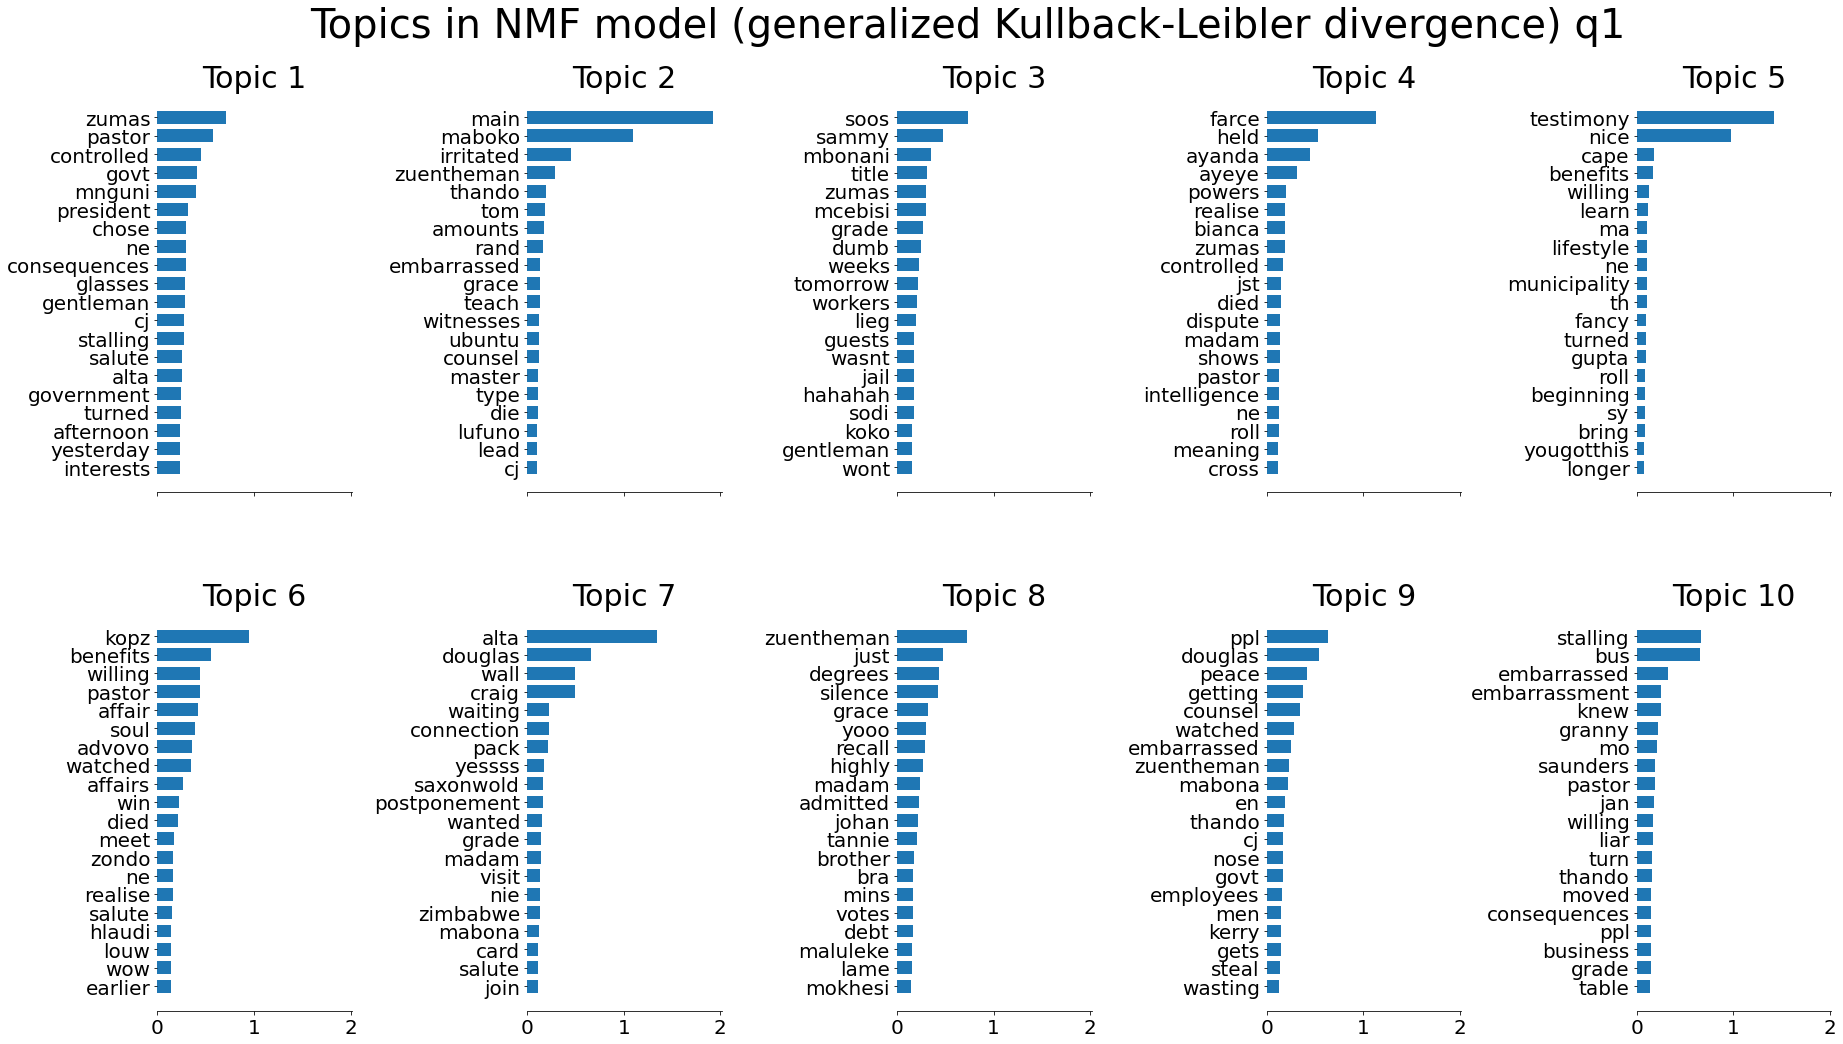

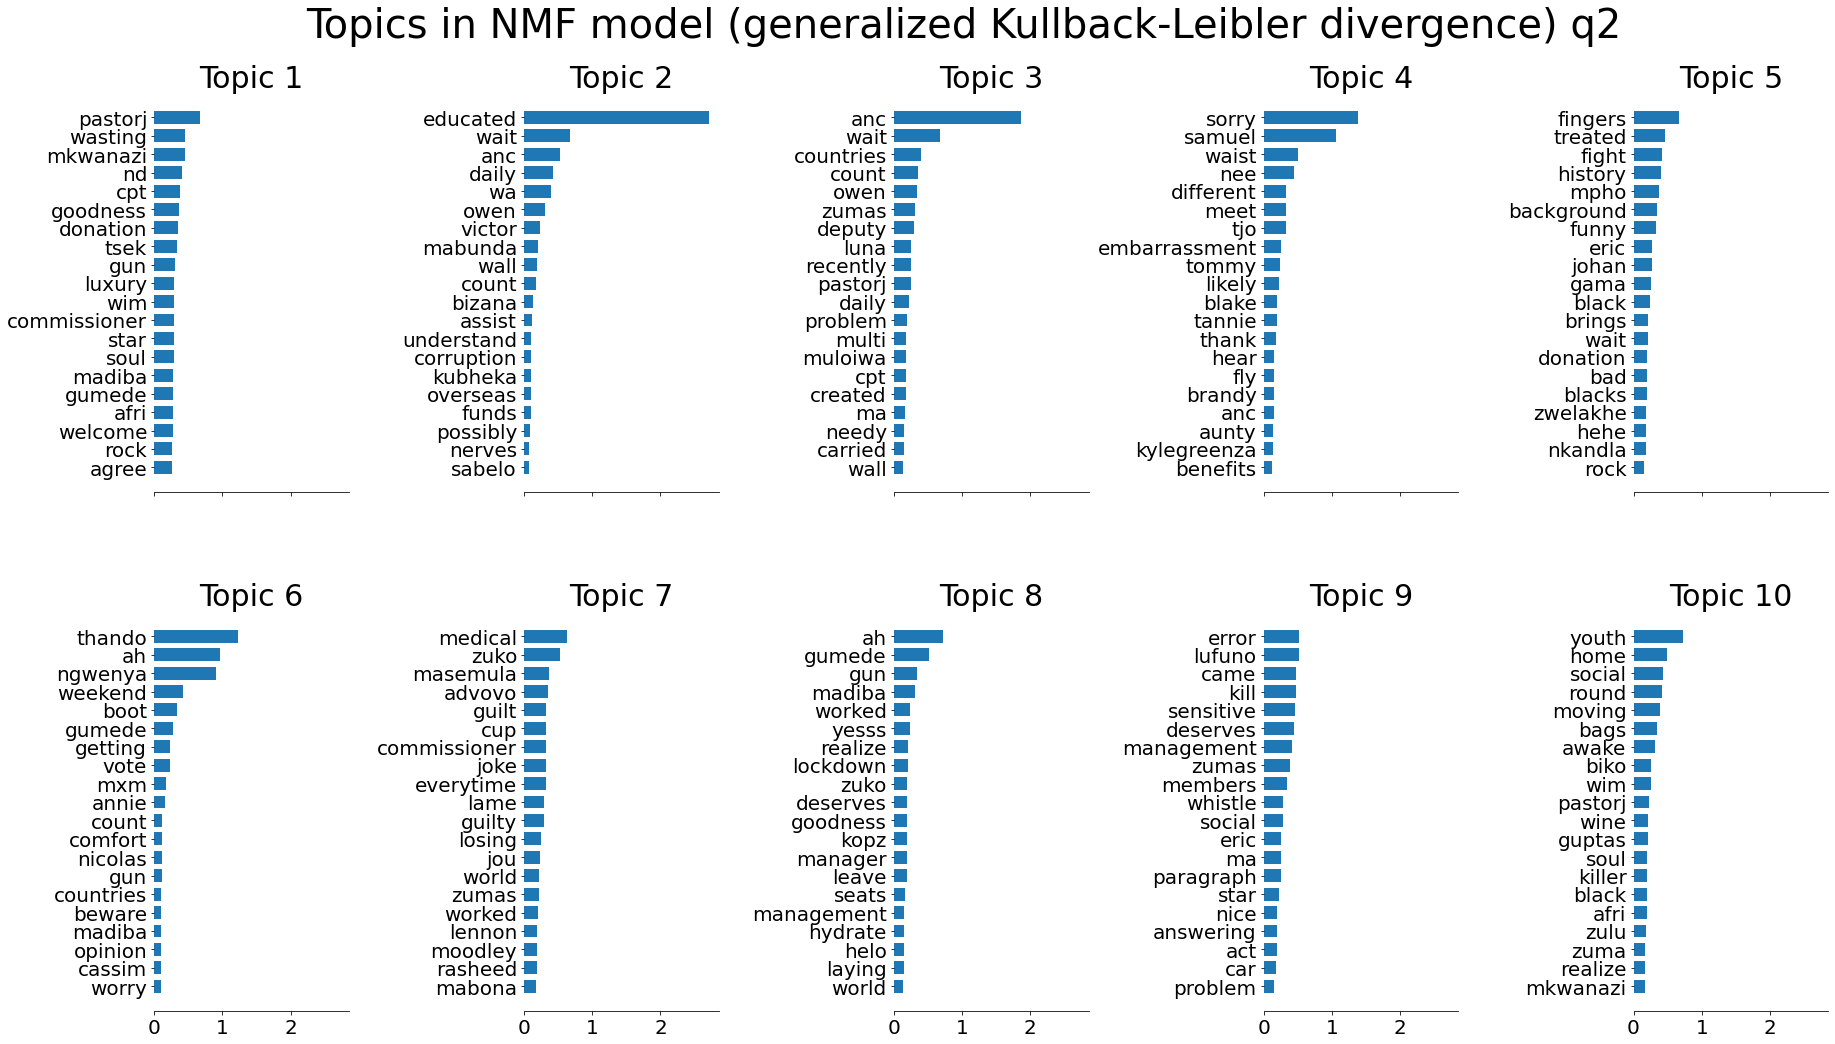

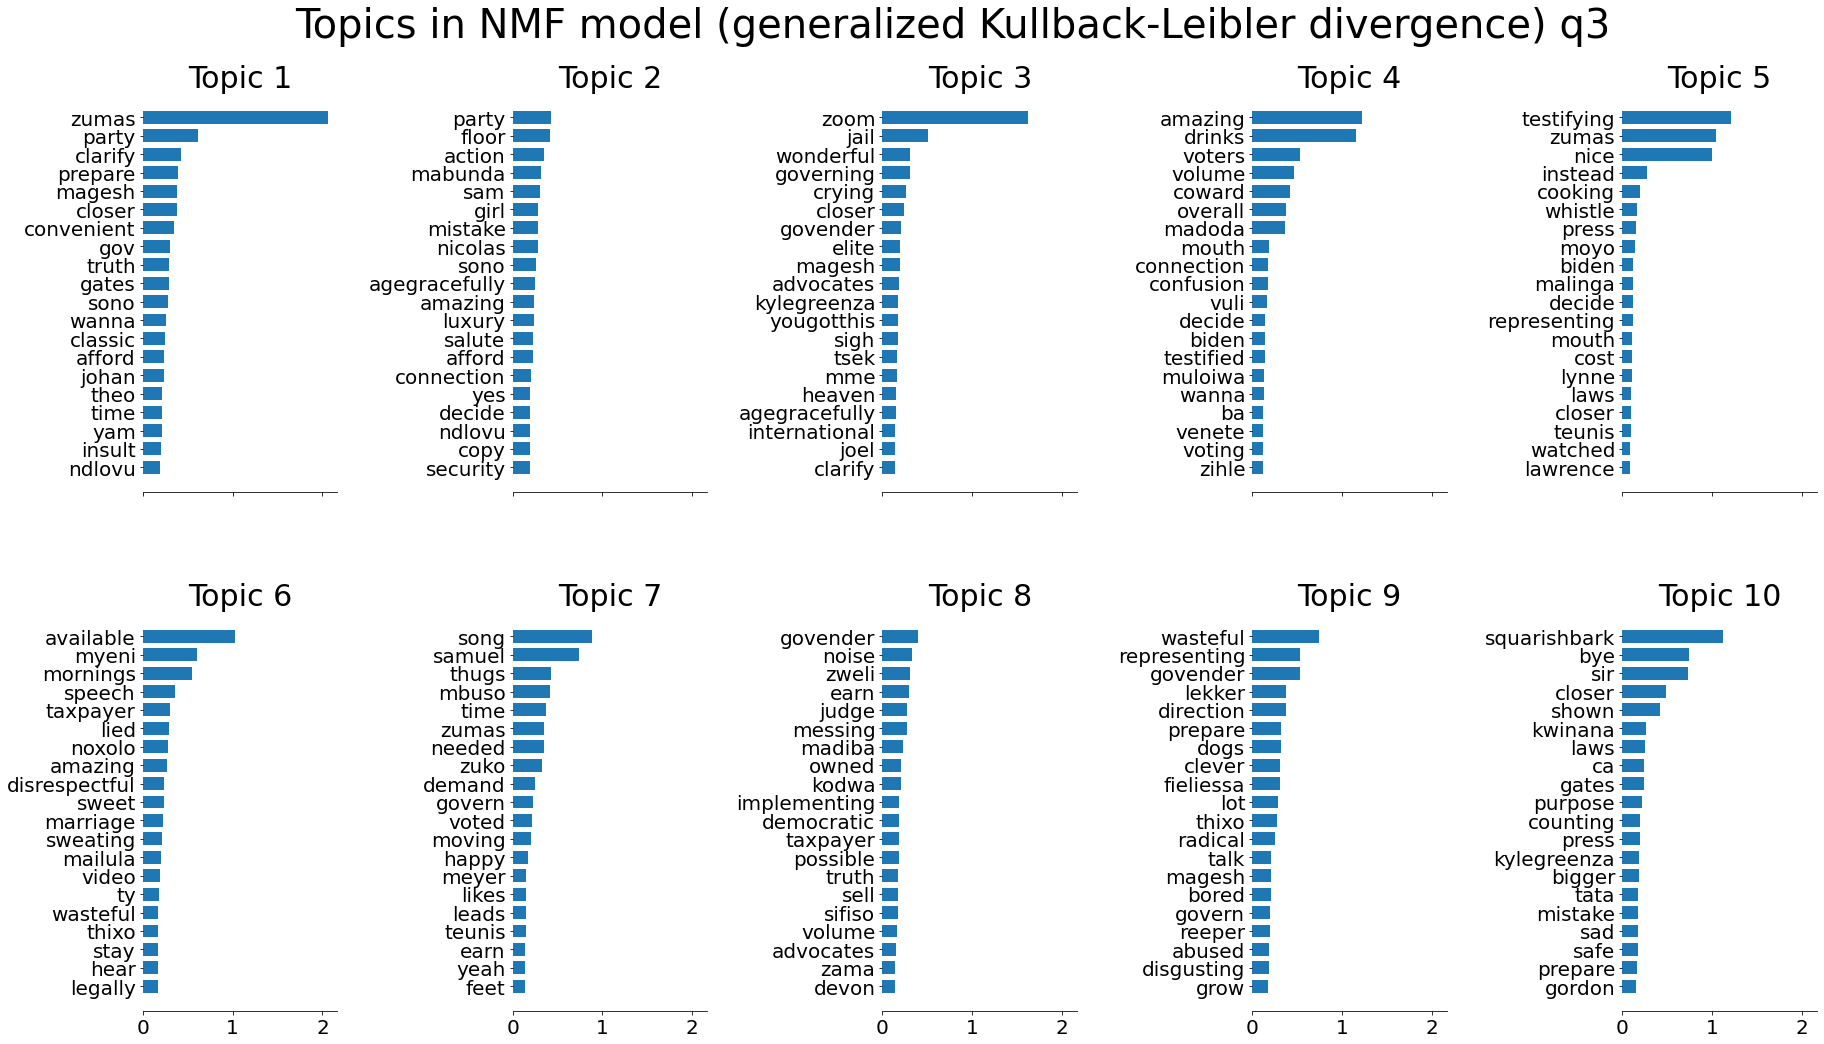

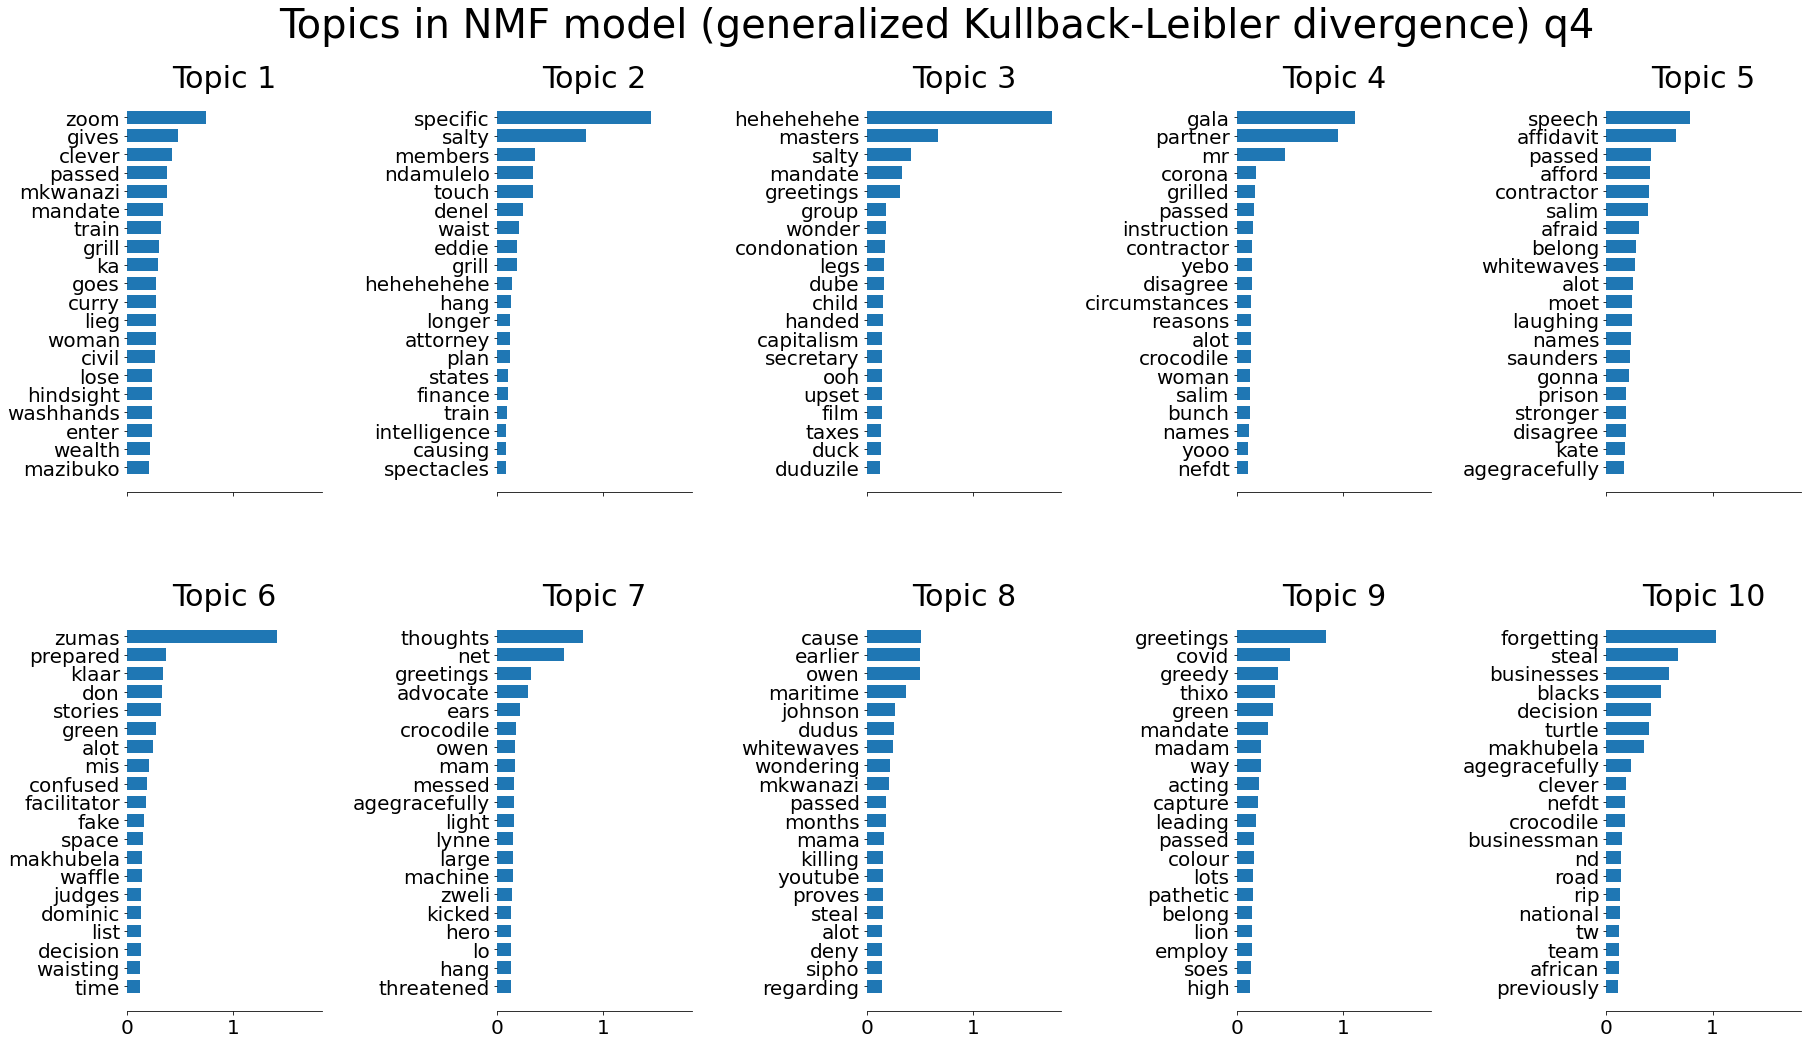

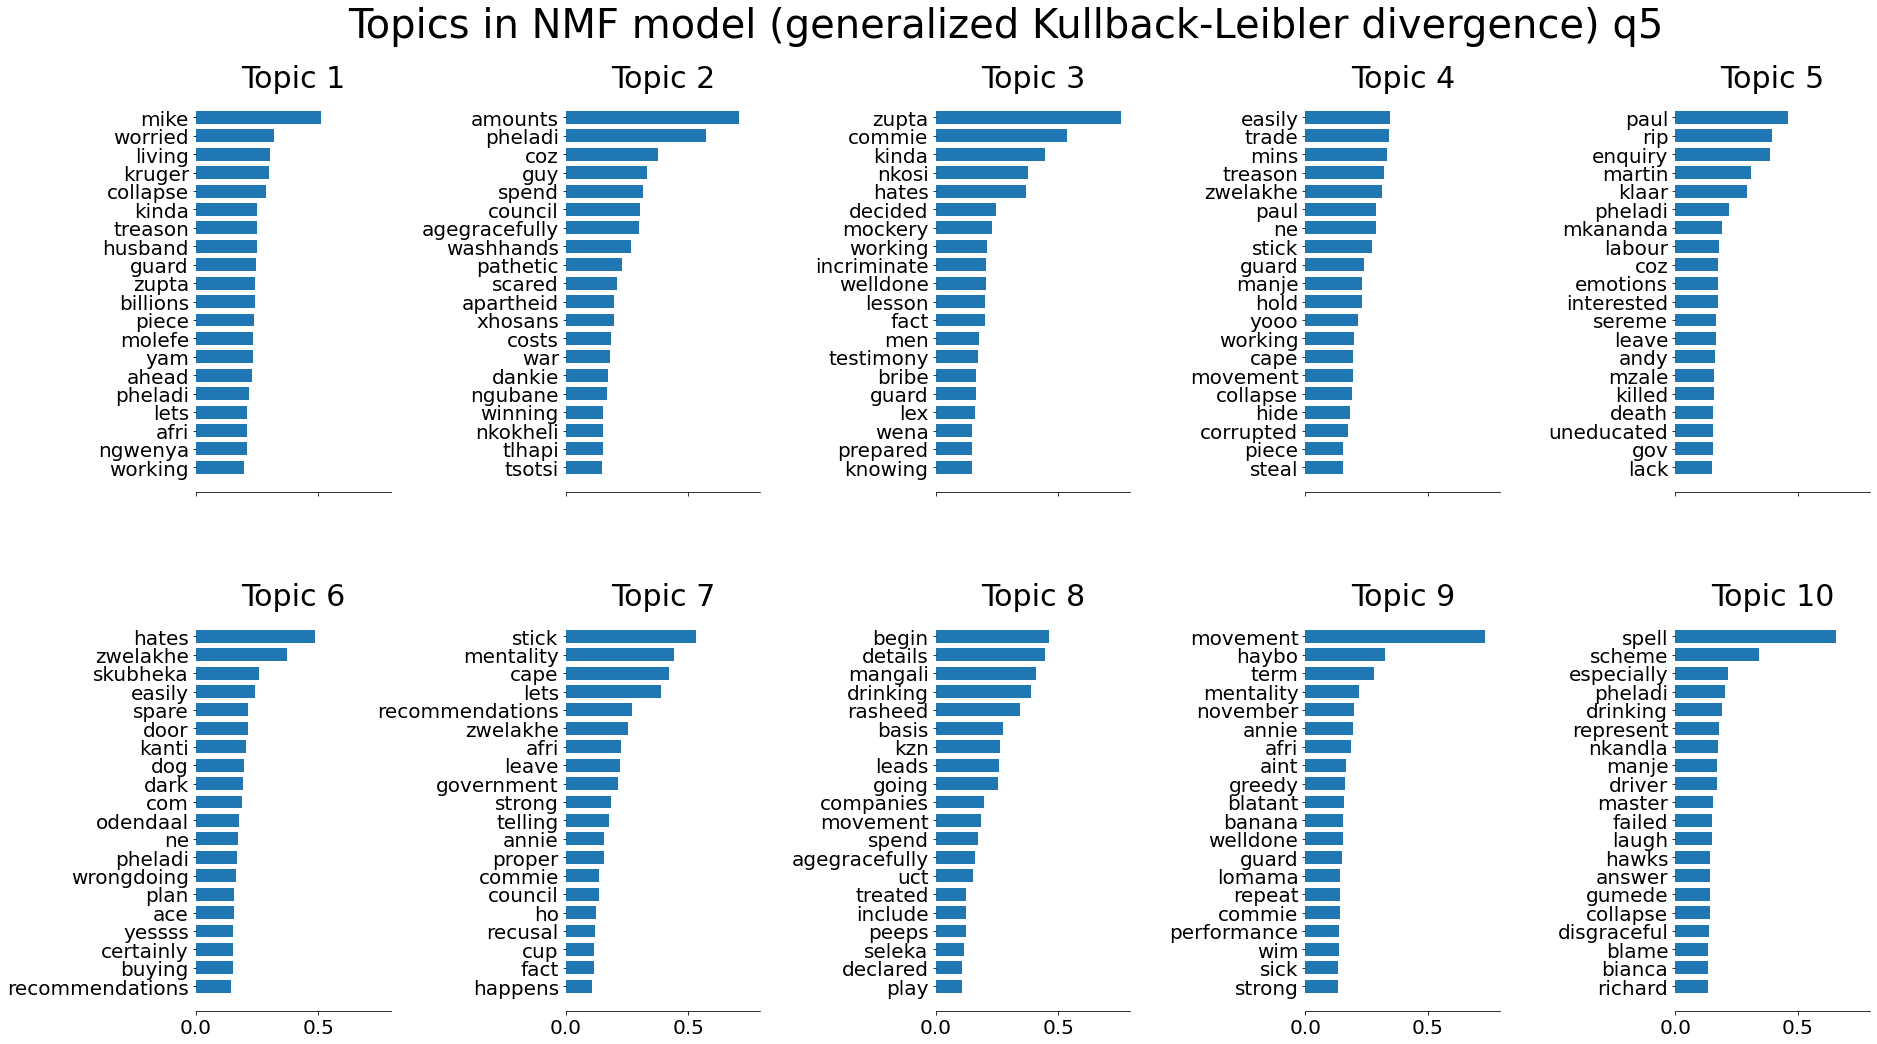

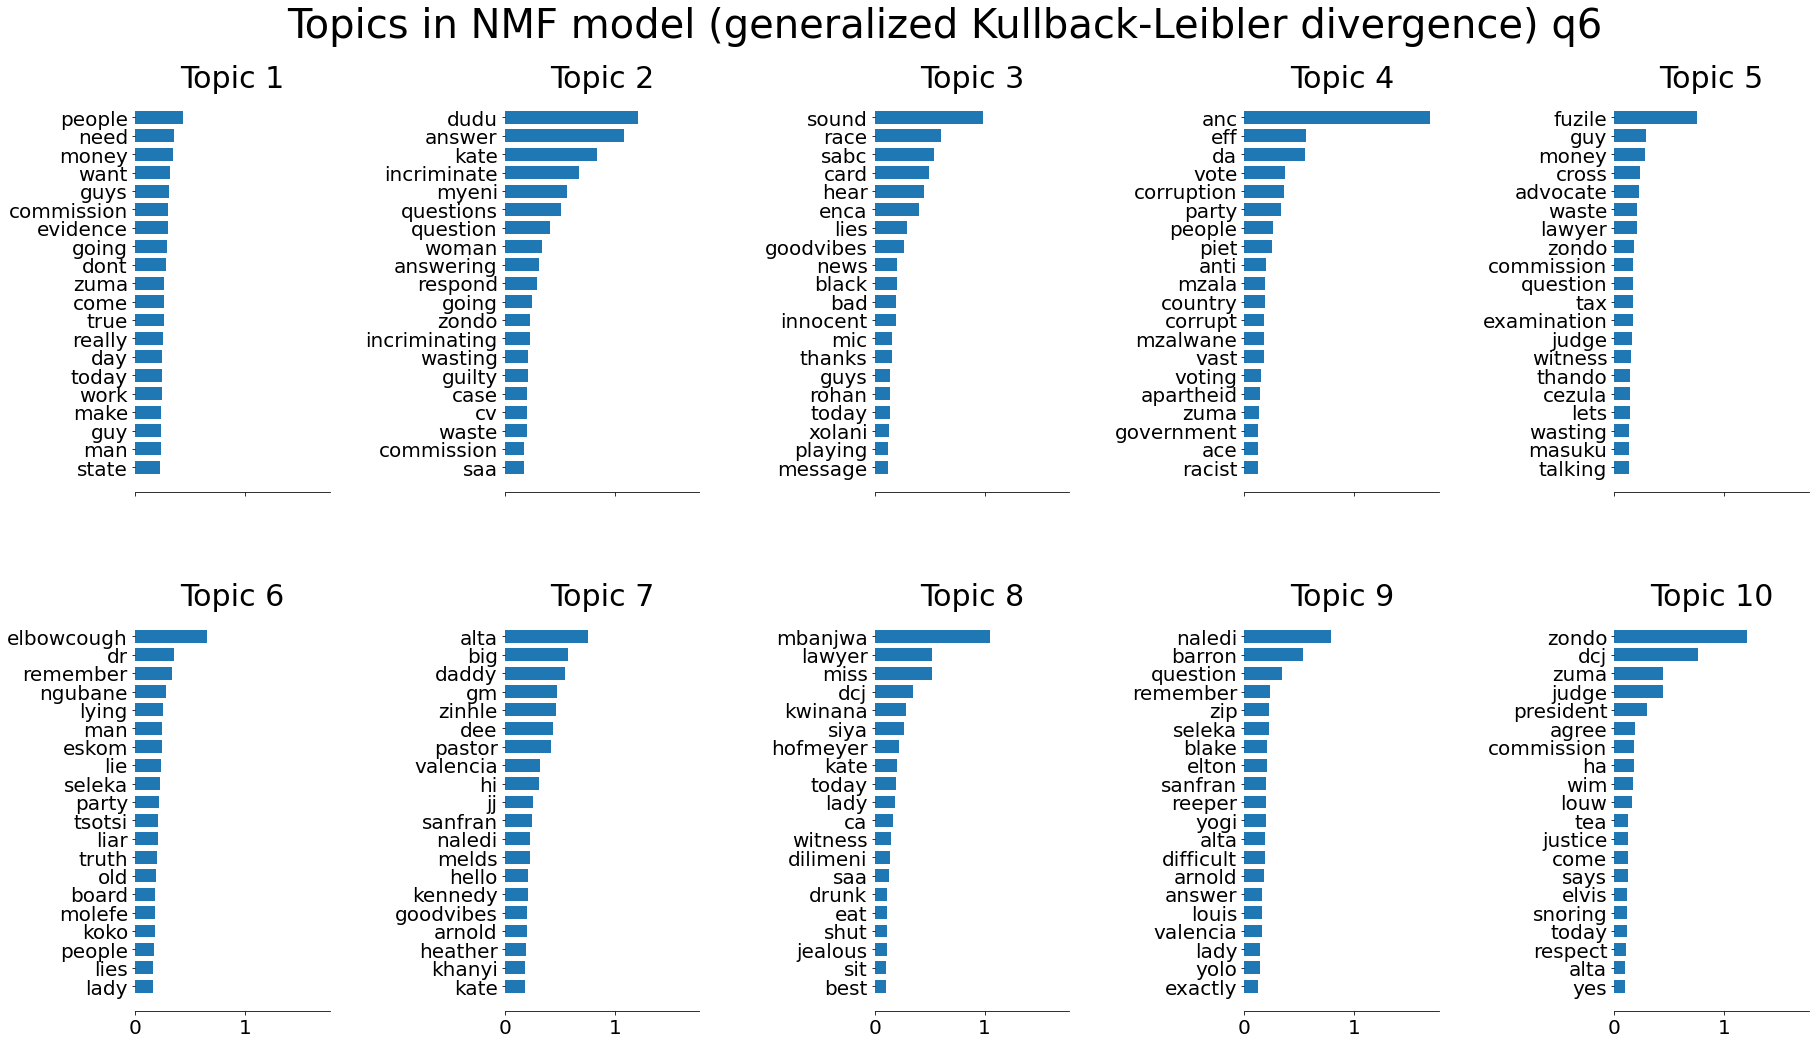

In [123]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

from numpy import *

n_samples = 4000
n_features = 3000
n_components = 10
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    counter = 0
    topicsList = []
    topicWeightsSum = []
    actualWords = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        actualWords.append(top_features[0]) #save top 3 words in topic
        actualWords.append(top_features[1]) 
        actualWords.append(top_features[2])
        topTwoWeights = weights[0] + weights[1]#for year by year data
        topicsList.append(topTwoWeights) 
        weightsSum = sum(weights) #get total weights sum
        topicWeightsSum.append(weightsSum) #will be used in graph

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
    
# Load the dataset and vectorize it.
print("Loading dataset...")
t0 = time()
data_samples1 = q1papers['message_processed'][:n_samples]
print(len(q2papers['message_processed']))
data_samples2 = q2papers['message_processed'][:6000]
data_samples3 = q3papers['message_processed'][:n_samples]
data_samples4 = q4papers['message_processed'][:n_samples]
data_samples5 = q5papers['message_processed'][:n_samples]
data_samples6 = q6papers['message_processed'][:n_samples]
# data_samples2 = papers2['message_processed'][:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=n_features,stop_words='english')
t0 = time()
tfidf1 = tfidf_vectorizer.fit_transform(data_samples1)
tfidf2 = tfidf_vectorizer.fit_transform(data_samples2)
tfidf3 = tfidf_vectorizer.fit_transform(data_samples3)
tfidf4 = tfidf_vectorizer.fit_transform(data_samples4)
tfidf5 = tfidf_vectorizer.fit_transform(data_samples5)
tfidf6 = tfidf_vectorizer.fit_transform(data_samples6)


# Fit the model
print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf1 = NMF(n_components=n_components, random_state=1,beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,l1_ratio=.5).fit(tfidf1)
nmf2 = NMF(n_components=n_components, random_state=1,beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,l1_ratio=.5).fit(tfidf2)
nmf3 = NMF(n_components=n_components, random_state=1,beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,l1_ratio=.5).fit(tfidf3)
nmf4 = NMF(n_components=n_components, random_state=1,beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,l1_ratio=.5).fit(tfidf4)
nmf5 = NMF(n_components=n_components, random_state=1,beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,l1_ratio=.5).fit(tfidf5)
nmf6 = NMF(n_components=n_components, random_state=1,beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,l1_ratio=.5).fit(tfidf6)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf1, tfidf_feature_names, n_top_words,'Topics in NMF model (generalized Kullback-Leibler divergence) q1')
plot_top_words(nmf2, tfidf_feature_names, n_top_words,'Topics in NMF model (generalized Kullback-Leibler divergence) q2')
plot_top_words(nmf3, tfidf_feature_names, n_top_words,'Topics in NMF model (generalized Kullback-Leibler divergence) q3')
plot_top_words(nmf4, tfidf_feature_names, n_top_words,'Topics in NMF model (generalized Kullback-Leibler divergence) q4')
plot_top_words(nmf5, tfidf_feature_names, n_top_words,'Topics in NMF model (generalized Kullback-Leibler divergence) q5')
plot_top_words(nmf6, tfidf_feature_names, n_top_words,'Topics in NMF model (generalized Kullback-Leibler divergence) q6')

In [124]:
zuma = data_samples1.str.count("zuma").sum()
eskom = data_samples1.str.count("eskom").sum()
transnet = data_samples1.str.count("zondo").sum()
bosasa = data_samples1.str.count("jail").sum()
agrizzi = data_samples1.str.count("agrizzi").sum() 
corruption = data_samples1.str.count("corruption").sum()
anc = data_samples1.str.count("anc").sum()
money = data_samples1.str.count("money").sum()

zuma1 = data_samples2.str.count("zuma").sum()
eskom1 = data_samples2.str.count("eskom").sum()
transnet1 = data_samples2.str.count("zondo").sum()
bosasa1 = data_samples2.str.count("jail").sum()
agrizzi1 = data_samples2.str.count("agrizzi").sum()
corruption1 = data_samples2.str.count("corruption").sum()
anc1 = data_samples2.str.count("anc").sum()
money1 = data_samples2.str.count("money").sum()

zuma3 = data_samples3.str.count("zuma").sum()
eskom3 = data_samples3.str.count("eskom").sum()
transnet3 = data_samples3.str.count("zondo").sum()
bosasa3 = data_samples3.str.count("jail").sum()
agrizzi3 = data_samples3.str.count("agrizzi").sum()
corruption3 = data_samples3.str.count("corruption").sum()
anc3 = data_samples3.str.count("anc").sum()
money3 = data_samples3.str.count("money").sum()

zuma4 = data_samples4.str.count("zuma").sum()
eskom4 = data_samples4.str.count("eskom").sum()
transnet4 = data_samples4.str.count("zondo").sum()
bosasa4 = data_samples4.str.count("jail").sum()
agrizzi4 =data_samples4.str.count("agrizzi").sum()
corruption4 = data_samples4.str.count("corruption").sum()
anc4 = data_samples4.str.count("anc").sum()
money4 = data_samples4.str.count("money").sum()

zuma5 = data_samples5.str.count("zuma").sum()
eskom5 = data_samples5.str.count("eskom").sum()
transnet5 = data_samples5.str.count("zondo").sum()
bosasa5 = data_samples5.str.count("jail").sum()
agrizzi5 = data_samples5.str.count("agrizzi").sum()
corruption5 = data_samples5.str.count("corruption").sum()
anc5 = data_samples5.str.count("anc").sum()
money5 = data_samples5.str.count("money").sum()

zuma6 = data_samples6.str.count("zuma").sum()
eskom6 = data_samples6.str.count("eskom").sum()
transnet6 = data_samples6.str.count("zondo").sum()
bosasa6 = data_samples6.str.count("jail").sum()
agrizzi6 = data_samples6.str.count("agrizzi").sum()
corruption6 = data_samples6.str.count("corruption").sum()
anc6 = data_samples6.str.count("anc").sum()
money6 = data_samples6.str.count("money").sum()

from collections import Counter
results = Counter()
q1count = data_samples1.str.lower().str.split().apply(results.update)
q2count = data_samples2.str.lower().str.split().apply(results.update)
q3count = data_samples3.str.lower().str.split().apply(results.update)
q4count = data_samples4.str.lower().str.split().apply(results.update)
q5count = data_samples5.str.lower().str.split().apply(results.update)
q6count = data_samples6.str.lower().str.split().apply(results.update)
q1totalWords = len(q1count)
q2totalWords = len(q2count)
q3totalWords = len(q3count)
q4totalWords = len(q4count)
q5totalWords = len(q5count)
q6totalWords = len(q6count)

print(q1totalWords, q2totalWords, q3totalWords, q4totalWords, q5totalWords, q6totalWords)

zuma1 = ((zuma/q1totalWords))
zuma2 = ((zuma1/q2totalWords))
zuma3 = ((zuma3/q3totalWords))
zuma4 = ((zuma4/q4totalWords))
zuma5 = ((zuma5/q5totalWords))
zuma6 = ((zuma6/q6totalWords))
print('zuma---> ', zuma1, zuma2, zuma3, zuma4, zuma5, zuma6)

money1 = ((money/q1totalWords))
money2 = ((money1/q2totalWords))
money3 = ((money3/q3totalWords))
money4 = ((money4/q4totalWords))
money5 = ((money5/q5totalWords))
money6 = ((money6/q6totalWords))
print('money---> ', money1, money2, money3, money4, money5, money6)

anc1 = ((anc/q1totalWords))
anc2 = ((anc1/q2totalWords))
anc3 = ((anc3/q3totalWords))
anc4 = ((anc4/q4totalWords))
anc5 = ((anc5/q5totalWords))
anc6 = ((anc6/q6totalWords))
print('anc---> ', anc1, anc2, anc3, anc4, anc5, anc6)

bosasa1 = ((bosasa/q1totalWords))
bosasa2 = ((bosasa1/q2totalWords))
bosasa3 = ((bosasa3/q3totalWords))
bosasa4 = ((bosasa4/q4totalWords))
bosasa5 = ((bosasa5/q5totalWords))
bosasa6 = ((bosasa6/q6totalWords))
print('bosasa---> ', bosasa1, bosasa2, bosasa3, bosasa4, bosasa6, bosasa6)

agrizzi1 = ((agrizzi/q1totalWords))
print(agrizzi1, agrizzi1)
agrizzi2 = ((agrizzi1/q2totalWords))
agrizzi3 = ((agrizzi3/q3totalWords))
agrizzi4 = ((agrizzi4/q4totalWords))
agrizzi5 = ((agrizzi5/q5totalWords))
agrizzi6 = ((agrizzi6/q6totalWords))
print('agrizzi---> ', agrizzi1, agrizzi2, agrizzi3, agrizzi4, agrizzi5, agrizzi6)

corruption1 = ((corruption/q1totalWords))
corruption2 = ((corruption1/q2totalWords))
corruption3 = ((corruption3/q3totalWords))
corruption4 = ((corruption4/q4totalWords))
corruption5 = ((corruption5/q5totalWords))
corruption6 = ((corruption6/q6totalWords))
print('corruption---> ', corruption1, corruption2, corruption3, corruption4, corruption5, corruption6)

eskom1 = ((eskom/q1totalWords))
eskom2 = ((eskom1/q2totalWords))
eskom3 = ((eskom3/q3totalWords))
eskom4 = ((eskom4/q4totalWords))
eskom5 = ((eskom5/q5totalWords))
eskom6 = ((eskom6/q6totalWords))
print('eskom---> ', eskom1, eskom2, eskom3, eskom4, eskom5, eskom6)

transnet1 = ((transnet/q1totalWords))
transnet2 = ((transnet1/q2totalWords))
transnet3 = ((transnet3/q3totalWords))
transnet4 = ((transnet4/q4totalWords))
transnet5 = ((transnet5/q5totalWords))
transnet6 = ((transnet6/q6totalWords))
print('zondo---> ', transnet1, transnet2, transnet3, transnet4, transnet5, transnet6)

2504 6000 4000 3084 1929 4000
zuma--->  0.31190095846645366 5.198349307774228e-05 0.86025 0.23540856031128404 0.15448418869880767 0.1495
money--->  0.1273961661341853 2.1232694355697552e-05 0.12425 0.13910505836575876 0.2006220839813375 0.1245
anc--->  0.3817891373801917 6.363152289669862e-05 0.31875 0.24221789883268482 0.3167444271643339 0.33025
bosasa--->  0.04832268370607029 8.053780617678381e-06 0.0515 0.04345006485084306 0.0595 0.0595
0.0 0.0
agrizzi--->  0.0 0.0 0.014 0.020103761348897537 0.021254536029030584 0.01075
corruption--->  0.08226837060702875 1.3711395101171459e-05 0.08275 0.07166018158236057 0.10730948678071539 0.07525
eskom--->  0.011182108626198083 1.8636847710330137e-06 0.0105 0.029507133592736705 0.00673924313115604 0.031
zondo--->  0.1757188498402556 2.928647497337593e-05 0.23075 0.17704280155642024 0.17833074131674442 0.215


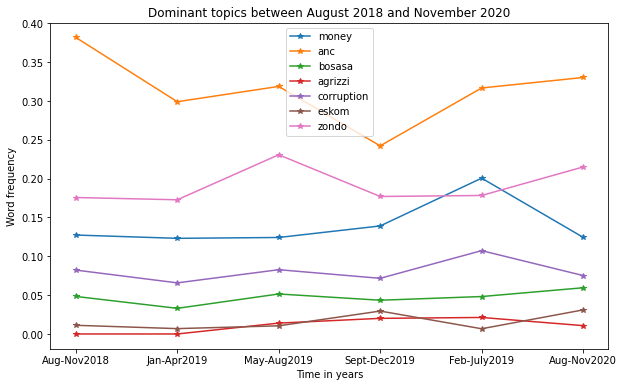

In [142]:
import matplotlib.pyplot as plt
# Monthly average precipitation
g1 = ( money1, anc1, bosasa1, agrizzi1, corruption1, eskom1, transnet1)
g2 = ( money2*5800, anc2*4700, bosasa2*4100, agrizzi2*3700, corruption2*4800, eskom2*3700, transnet2*5900)
g3 = ( money3, anc3, bosasa3, agrizzi3, corruption3, eskom3, transnet3)
g4 = ( money4, anc4, bosasa4, agrizzi4, corruption4, eskom4, transnet4)
g5 = ( money5, anc5, bosasa5, agrizzi5, corruption5, eskom5, transnet5)
g6 = ( money6, anc6, bosasa6, agrizzi6, corruption6, eskom6, transnet6)
boulder_monthly_precip = [
    g1, g2, g3, g4, g5, g6
]
# print(g2[0] *1000)

months = ["Aug-Nov2018", "Jan-Apr2019", "May-Aug2019", "Sept-Dec2019", "Feb-July2019","Aug-Nov2020"]

# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Set plot title and axes labels
ax.set(title = "Dominant topics between August 2018 and November 2020",
       xlabel = "Time in years",
       ylabel = "Word frequency")

# Define x and y axes
ax.plot(months, boulder_monthly_precip, marker = '*')

# Function add a legend
ax.legend([ 'money', 'anc', 'bosasa', 'agrizzi', 'corruption', 'eskom', 'zondo'])

# function to show the plot
plt.show()
